## Imports, Data loading & preprocessing

In [19]:
import numpy as np 
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt 
from matplotlib.pyplot import cm
import seaborn as sns
import plotly.graph_objects as go
import mpl_toolkits.mplot3d  # noqa: F401
from sklearn.cluster import KMeans
from sklearn import datasets
import statistics as s

In [4]:
demographic = pd.read_csv('data/demographics_mimic4.csv', delimiter=',')


      stay_id gender  age        los     bmi  death  gcs
0    30006565      M   53   3.325139  22.784      0    6
1    30008528      F   56   2.814954     NaN      0    6
2    30026588      F   68   4.059398     NaN      0    9
3    30033718      F   50   8.457454  24.285      0    9
4    30035412      F   19   7.523762  27.588      0    9
..        ...    ...  ...        ...     ...    ...  ...
944  39935682      M   24   2.167859     NaN      0   12
945  39940048      F   66   8.703519  21.028      0   10
946  39945709      M   76  12.393704     NaN      0   10
947  39956278      F   61   3.601539     NaN      0    8
948  39985110      F   79   6.632975  24.983      0    9

[949 rows x 7 columns]


## Univariate analysis

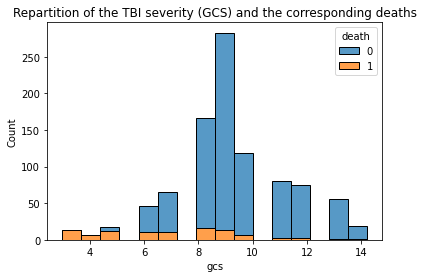

[Text(0.5, 1.0, 'Repartition of the TBI severity (GCS) and the corresponding deaths')]

In [5]:
sns.histplot(data = demographic, x = "gcs", hue = "death", multiple="stack", binwidth=0.7).set(title='Repartition of the TBI severity (GCS) and the corresponding deaths')

3.8941203703703695


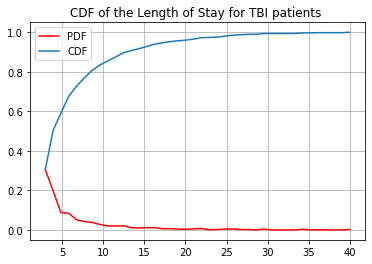

In [20]:
count, bins_count = np.histogram(demographic['los'], bins=40)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], pdf, color="red", label="PDF")
plt.plot(bins_count[1:], cdf, label="CDF")
plt.legend()
plt.grid()
plt.title('CDF of the Length of Stay for TBI patients ')
print(s.median(demographic['los']))

## Multivariate analysis

In [40]:
fig = go.Figure()
fig.add_trace(go.Box( y = demographic['age'], x= demographic['death'], boxpoints='all'))
fig.update_layout(xaxis_title='Deaths repartition -  0 = stayed alive during the ICU stay, 1 = died during the ICU stay - N = 614', yaxis_title = "Age in years")


In [42]:
fig = go.Figure()
fig.add_trace(go.Box( y = demographic['gcs'], x= demographic['death'], boxpoints='all', marker_color = 'red'))
fig.update_layout(xaxis_title='Deaths repartition -  0 = stayed alive during the ICU stay, 1 = died during the ICU stay - N = 614', yaxis_title = "Glasgow Coma Scale (GCS)")
